# MONSTER JOB POSTING ETL

In [ ]:
top_skills = [
        "Python",
        "SQL",
        "R",
        "Spark",
        "SAS",
        "Javascript",
        "SAAS",
        "Hive",
        "Scala",
        "Excel",
        "TensorFlow",
        "C++",
        "Azure",
        "NoSQL",
        "Linux",
        "C",
        "Matlab",
        "Hadoop",
        "Java",
        "Tableau",
        "AWS",
        "Git",
        "Javascript",
        "Pig",
        "Hbase",
        "Google Cloud",
        "Docker",
        "NumPy",
        "PyTorch",
        "C#",
        "SPSS",
        "MySQL",
        "Perl",
        "Cassandra",
        "MongoDB",
        "GCP",
        "Kubernetes",
        "D3",
        "Databricks",
        "postgresql",
        "Caffe",
        "Airflow",
        "Alteryx",
        "BigQuery",
        "Fastai",
]

top_skills = [top_skill.upper() for top_skill in top_skills]
top_skills

### GET COUNT OF JOB POSTINGS FOR EACH SKILL IN SKILLSET LIST ACROSS THE U.S

In [851]:
def get_top_skill_count(top_skills):
    import pandas as pd
    from bs4 import BeautifulSoup as bs
    import matplotlib.pyplot as plt
    import calendar
    from splinter import Browser
    import datetime as dt
    from datetime import date, datetime, timedelta
    
    print("-------------------------------------------------------")
    print("Printing count of skills in Skillset list in U.S.A.....")
    print("-------------------------------------------------------")
    
    monster_list = []
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    #browser = Browser("chrome", **executable_path, headless=False)

    for term in top_skills:
        url = f'https://www.monster.com/jobs/search/?q=__22data-scientist__22-__22{term}__22'
        try:
            r = requests.get(url)
            soup = bs(r.text, 'html.parser')
            count_str = soup.find('h2', class_="figure").get_text()
            numb = count_str.split()
            monster_count = numb[0].replace("(", "")
            monster_list.append(monster_count)

        except Exception as e:
            pass
    
    monster_list.append(0) # because no results for fastai. change to check if length matches first.
    
    df = pd.DataFrame(monster_list, index=top_skills, columns=[f'Monster Skill Count {date.today()}'])
    return df

In [852]:
get_top_skill_count(top_skills)

-------------------------------------------------------
Printing count of skills in Skillset list in U.S.A.....
-------------------------------------------------------


,Monster Skill Count 2020-02-22
PYTHON,2958
SQL,2089
R,2366
SPARK,1287
SAS,808
JAVASCRIPT,306
SAAS,54
HIVE,615
SCALA,624
EXCEL,395


#### EXPLORATORY ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
x = get_top_skill_count(top_skills)

In [882]:
x = x.apply(lambda x:x.astype(float), axis=1).sort_values(by='Monster Skill Count 2020-02-22', ascending=False)
x.head()

,Monster Skill Count 2020-02-22
PYTHON,2958.0
R,2366.0
SQL,2089.0
SPARK,1287.0
HADOOP,1155.0


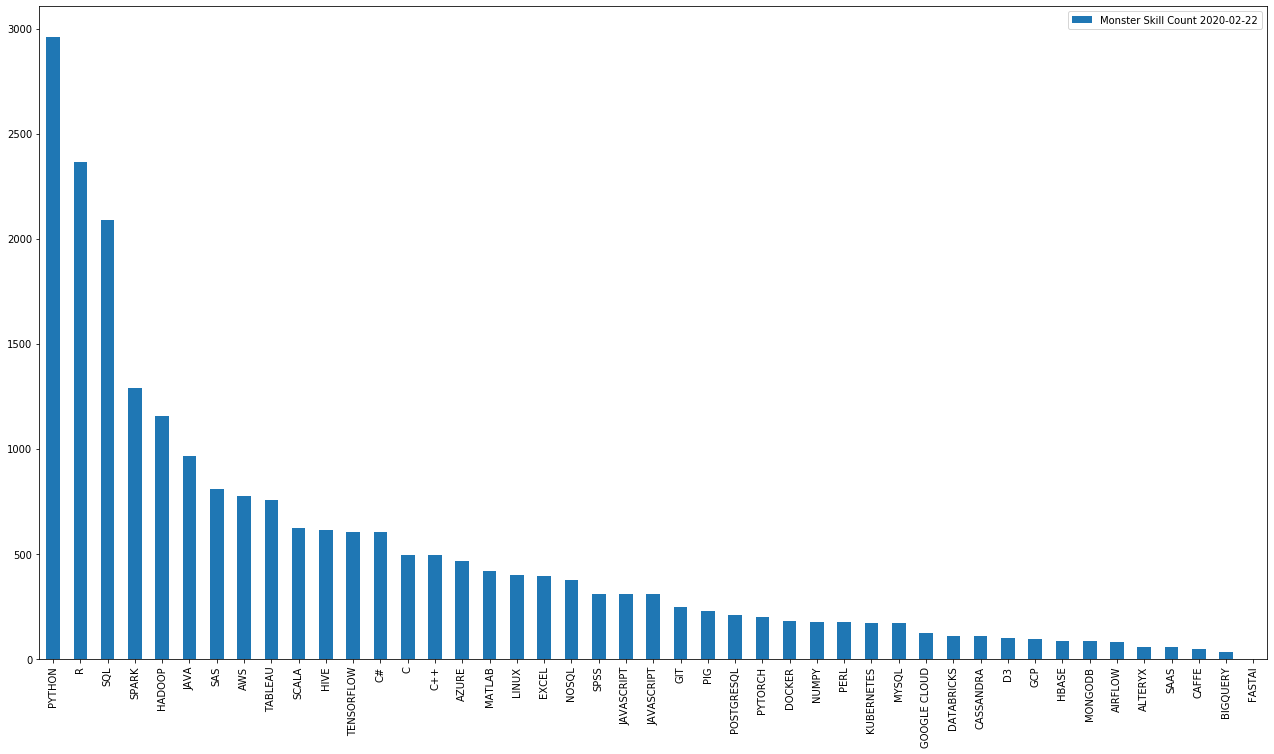

In [893]:
x.plot(kind='bar', figsize=(22,12))


#### LOADING SKILLSET COUNT TO POSTGRES DATABASE

In [818]:
import sqlite3
from sqlalchemy import create_engine , inspect
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float, DateTime

In [ ]:
skills = get_top_skill_count(top_skills).reset_index()#T.to_dict('list')
skills.columns = ["Skill", "Count"]
skills

In [ ]:
# Create the posting class (the posting table that will be in the db)
class skills_count(Base):
    __tablename__ = 'Skill_counts'
    id = Column(Integer, primary_key=True)
    Skill = Column(String(255))
    Count = Column(String(255))

In [833]:
# Create a connection to a SQLite database
engine = create_engine('sqlite:///skills_count.db')
conn = engine.connect()
Base.metadata.create_all(engine)  #this should create the table based on the classes defined
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [834]:
# Iterate over df and add rows as records to table
for i in skills.itertuples():
    try:
        record = Skill_counts(Skill = i.Skill, Count = i.Count)
        session.add(record)
        session.commit()
 
    except:
        pass

#### TEST TO SEE IF IT WAS LOADED CORRECTLY

In [836]:
inspector = inspect(engine)
inspector.get_table_names()

['posting', 'skill_count', 'skill_counts']

In [837]:
columns = inspector.get_columns('skill_counts')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
Skill VARCHAR(255)
Count INTEGER


In [849]:
skill_count = session.query(skills_count)
for skill in skill_count:
    print(skill.Skill)

PYTHON
SQL
R
SPARK
SAS
JAVASCRIPT
SAAS
HIVE
SCALA
EXCEL
TENSORFLOW
C++
AZURE
NOSQL
LINUX
C
MATLAB
HADOOP
JAVA
TABLEAU
AWS
GIT
JAVASCRIPT
PIG
HBASE
GOOGLE CLOUD
DOCKER
NUMPY
PYTORCH
C#
SPSS
MYSQL
PERL
CASSANDRA
MONGODB
GCP
KUBERNETES
D3
DATABRICKS
POSTGRESQL
CAFFE
AIRFLOW
ALTERYX
BIGQUERY
FASTAI


####  RESET DATABASE

In [ ]:
# Use this to clear out the db when necessary

#Base.metadata.drop_all(engine)

## GET JOB POSTING DATA FOR ANY DATA SCIENCE SKILL

In [957]:
def get_skill_data():
    import numpy as np
    import pandas as pd
    from bs4 import BeautifulSoup as bs
    import calendar
    import datetime as dt
    from datetime import date, datetime, timedelta
    import requests
    import re
    from splinter import Browser

    term = input("Hi there! What data science skill would you like to find out about today?    ")
    print("--------------------------------------------------------------------------------")
    n = int(input("How many job postings would you like to see?    "))
    print("--------------------------------------------------------------------------------")

    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    browser = Browser("chrome", **executable_path, headless=False)
    top_skills_data = []

    term = "python"

    week_day = []
    posted = []
    datee = []
    title = []
    company = []
    location = []
    city = []
    state = []
    zipcode = []
    scraped_data = {}
    title_resultss = []
    company_resultss = []
    location_resultss = []
    date_resultss = []

    url = f'https://www.monster.com/jobs/search/?q=__22data-scientist__22-__22{term}__22'

    i = 0

    try:
        browser.visit(url)


        while i <= n:
            try:

                title_path = f'//*[@id="SearchResults"]/section[{i}]/div/div[2]/header/h2/a'
                title_results = browser.find_by_xpath(title_path)
                
                if title_results:
                    title_resultss.append(title_results)

                    date_path = f'//*[@id="SearchResults"]/section[{i}]/div/div[3]/time'
                    date_results = browser.find_by_xpath(date_path)
                    date_resultss.append(date_results)

                    company_path = f'//*[@id="SearchResults"]/section[{i}]/div/div[2]/div[1]/span'
                    company_results = browser.find_by_xpath(company_path)
                    company_resultss.append(company_results)

                    location_path = f'//*[@id="SearchResults"]/section[{i}]/div/div[2]/div[2]/span'
                    location_results = browser.find_by_xpath(location_path)
                    location_resultss.append(location_results)


            except Exception as e:
                pass 

            i += 1

        for i in list(range(len(title_resultss))):
            try:
                title.append(title_resultss[i].text)

                posted.append(date_resultss[i].text)

                company.append(company_resultss[i].text)

                if "today" in date_resultss[i].text:
                    datee.append(date.today().strftime("%m/%d/%Y"))

                    week_day.append(calendar.day_name[date.today().weekday()])
                else:
                    datee.append((date.today()-timedelta(days=int(re.findall(f'([0-9]+).+',date_resultss[i].text)[0]))).strftime("%m/%d/%Y"))

                    week_day.append(calendar.day_name[(date.today()-timedelta(days=int(re.findall(f'([0-9]+).+',date_resultss[i].text)[0]))).weekday()])

                location.append(location_resultss[i].text)

                city.append(location_resultss[i].text.split(',')[0])

                state.append(location_resultss[i].text.split(',')[1].split(" ")[1])

                try:

                    zipcode.append(location_resultss[i].text.split(',')[1].split(" ")[2])

                except:
                    zipcode.append(" ")

            except Exception as e:
                pass 


        scraped_data['date'] = datee
        scraped_data['posted'] = posted
        scraped_data['week_day'] = week_day
        scraped_data['title'] = title
        scraped_data['company'] = company
        #scraped_data['location'] = location
        scraped_data['city'] = city
        scraped_data['state'] = state
        #scraped_data['zipcode'] = zipcode
        top_skills_data.append(scraped_data)

    except Exception as e:
        pass

    browser.quit()
    
    return pd.DataFrame(top_skills_data[0])

In [960]:
x = get_skill_data()

Hi there! What data science skill would you like to find out about today?    python
--------------------------------------------------------------------------------
How many job postings would you like to see?    44
--------------------------------------------------------------------------------


In [962]:
x

,date,posted,week_day,title,company,city,state
0,02/18/2020,5 days ago,Tuesday,"Data Scientist - Machine Learning, Deep Learni...",CyberCoders,San Diego,CA
1,02/22/2020,1 day ago,Saturday,Data Analytics Architect/Senior Data Scientist...,Vital Tech Solutions,Green Bay,WI
2,02/18/2020,5 days ago,Tuesday,Data Scientist (NLP & Python),Randstad Technologies,Pennington,NJ
3,02/19/2020,4 days ago,Wednesday,Python Fintech Engineer / Developer and Data S...,Kavyos Consulting Inc,NYC,NY
4,02/19/2020,4 days ago,Wednesday,"Data Scientist with Hands on in Python, 2 week...",Prodapt North America,Ashburn,VA
5,02/18/2020,5 days ago,Tuesday,"Sr. Data Scientist - Python, Machine Learning,...",CyberCoders,Raleigh,NC
6,02/16/2020,7 days ago,Sunday,NLP Software Engineer (HOLDING),Fidelity TalentSource,Merrimack,NH
7,02/23/2020,Posted today,Sunday,"Sr Data Scientist - Broomfield, CO",CenturyLink,BROOMFIELD,CO
8,02/23/2020,Posted today,Sunday,Senior Data Engineer,The Hartford,Hartford,CT
9,02/22/2020,1 day ago,Saturday,Senior Data Engineer (HealthTech Company),Grow,Manhattan,NY


#### LOADING JOB POSTINGS TO MONGO DATABASE

In [963]:
import pymongo
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [1028]:
# Define database and collection
db = client.new_job_postings
collection = db.items

In [1029]:
#collection.insert_one(x.to_dict())
#a = x.set_index('date').T.to_dict("list")
a = x.to_dict("list")
a
key = list(a.keys())
value = list(a.values())
for i in range(len(key)):
    collection.insert_one({key[i]:value[i]})

In [1030]:
results = collection.find()
for result in results:
    print(result)

{'_id': ObjectId('5e521621693cb274859230cf'), 'date': ['02/18/2020', '02/22/2020', '02/18/2020', '02/19/2020', '02/19/2020', '02/18/2020', '02/16/2020', '02/23/2020', '02/23/2020', '02/22/2020', '02/20/2020', '02/19/2020', '02/14/2020', '02/14/2020', '01/30/2020', '01/24/2020', '02/23/2020', '02/22/2020', '02/22/2020', '02/22/2020', '02/22/2020', '02/21/2020', '02/20/2020', '02/19/2020', '02/18/2020']}
{'_id': ObjectId('5e521621693cb274859230d0'), 'posted': ['5 days ago', '1 day ago', '5 days ago', '4 days ago', '4 days ago', '5 days ago', '7 days ago', 'Posted today', 'Posted today', '1 day ago', '3 days ago', '4 days ago', '9 days ago', '9 days ago', '24 days ago', '+30 days ago', 'Posted today', '1 day ago', '1 day ago', '1 day ago', '1 day ago', '2 days ago', '3 days ago', '4 days ago', '5 days ago']}
{'_id': ObjectId('5e521621693cb274859230d1'), 'week_day': ['Tuesday', 'Saturday', 'Tuesday', 'Wednesday', 'Wednesday', 'Tuesday', 'Sunday', 'Sunday', 'Sunday', 'Saturday', 'Thursday',